<a href="https://colab.research.google.com/github/ErickMBarreto/TechChallenge2/blob/main/TechChallenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Projeto focado em organizar e distribuir os alunos em cada turma, para que não tenha turmas com muitos nomes parecidos
o objetivo é classificar pelos seguites dados:
- Primeira letra do nome (PLetra)
- Procedência (Proc)
- Sexo (Sexo)
- Idade (Idade)

# Bibliotecas usadas para gerar e verificar os dados:
- numpy;
- pandas;
- matplotlib;

In [ ]:
!pip install pygad

In [ ]:
import numpy as np
import pandas as pd
import pygad
import random
import csv

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white', palette=None)

# Criando os dados dos alunos

In [ ]:
def gerar_csv(nome_arquivo="alunos.csv", num_linhas=119):

    nomes_masculinos = [
      "Samuel", "Joao", "Pedro", "Davi", "Lucas", "Enzo", "Matheus", "Benjamin",
      "Carlos", "Felipe", "Igor", "Nicolas", "Otavio", "Quirino", "Ulisses",
      "Vinicius", "Washington", "Xavier", "Kiko", "Zeus"
    ]

    nomes_femininos = [
      "Valentina", "Lorena", "Luisa", "Beatriz", "Mariana", "Clara", "Livia", "Cecilia",
      "Eduarda", "Fernanda", "Giovanna", "Juliana", "Kelly", "Olivia", "Paula",
      "Rebeca", "Yasmin", "Zoe"
    ]
    procedencias = ["Vila Mariana", "Ibirapuera", "Tucuruvi", "Liberdade", "Santana", "Luz", "Se", "Republica", "Pinheiros", "Osasco", "Santo Amaro"]
    sexos = ["M", "F"]

    with open(nome_arquivo, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ["Nome", "PrimeiraLetra", "Procedencia", "Sexo", "Idade"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        for _ in range(num_linhas):
            sexo_aleatorio = random.choice(sexos)
            if sexo_aleatorio == "M":
                nome_aleatorio = random.choice(nomes_masculinos)
            else:
                nome_aleatorio = random.choice(nomes_femininos)

            primeira_letra = nome_aleatorio[0]
            procedencia_aleatoria = random.choice(procedencias)

            idades_possiveis = [10, 11, 12, 13]
            pesos = [1, 1, 6, 6]
            idade_aleatoria = random.choices(idades_possiveis, weights=pesos, k=1)[0]

            writer.writerow({
                "Nome": nome_aleatorio,
                "PrimeiraLetra": primeira_letra,
                "Procedencia": procedencia_aleatoria,
                "Sexo": sexo_aleatorio,
                "Idade": idade_aleatoria
            })

In [ ]:
gerar_csv()

# Analise dos dados gerados

In [ ]:
df = pd.read_csv('alunos.csv')
df.head(10)

,Nome,PrimeiraLetra,Procedencia,Sexo,Idade
0,Ulisses,U,Pinheiros,M,12
1,Beatriz,B,Santo Amaro,F,12
2,Eduarda,E,Pinheiros,F,11
3,Valentina,V,Santo Amaro,F,13
4,Washington,W,Pinheiros,M,10
5,Luisa,L,Santo Amaro,F,13
6,Enzo,E,Vila Mariana,M,12
7,Mariana,M,Osasco,F,13
8,Luisa,L,Santo Amaro,F,12
9,Beatriz,B,Luz,F,13


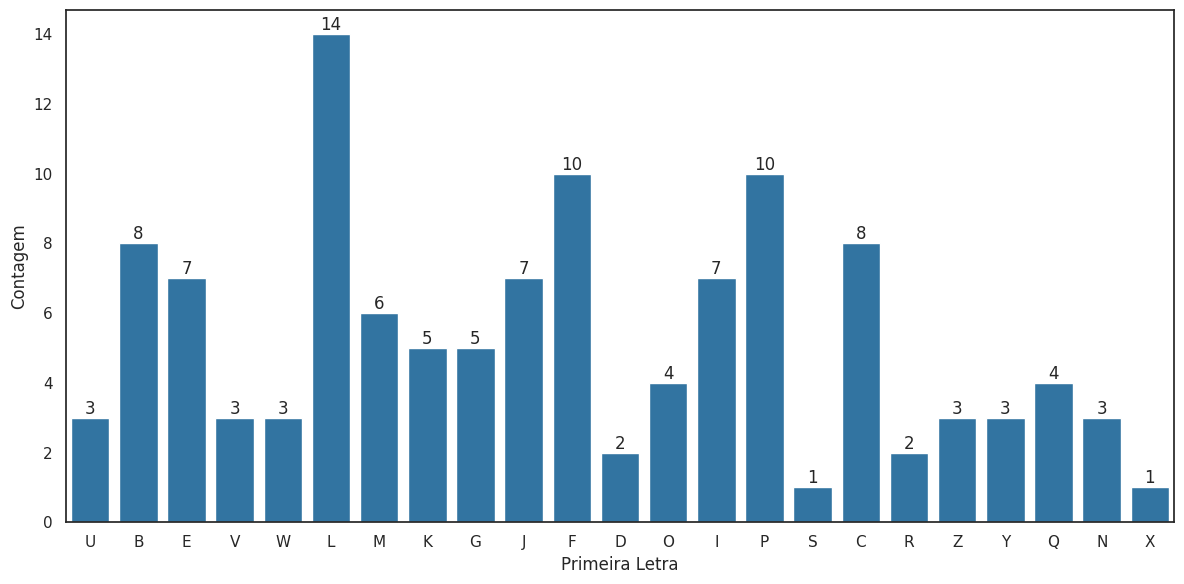

In [ ]:
df.PrimeiraLetra.value_counts()
plt.figure(figsize=(12,6))
plt.xlabel('Primeira Letra', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
ax=sns.countplot(data=df, x='PrimeiraLetra')
for container in ax.containers:
  ax.bar_label(container)
plt.tight_layout()

Como podemos ver, temos 14 alunos com a letra L, 10 com a letra F e P.
As letras S e X possuem apenas 1 aluno cada.
O restante esta bem distribuido.

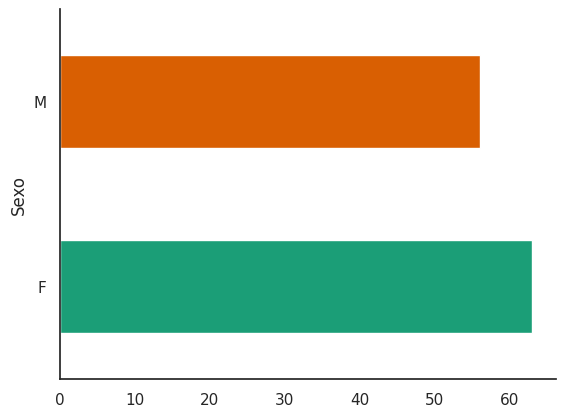

In [ ]:
df.groupby('Sexo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Entre os sexos a distribuição esta otima.

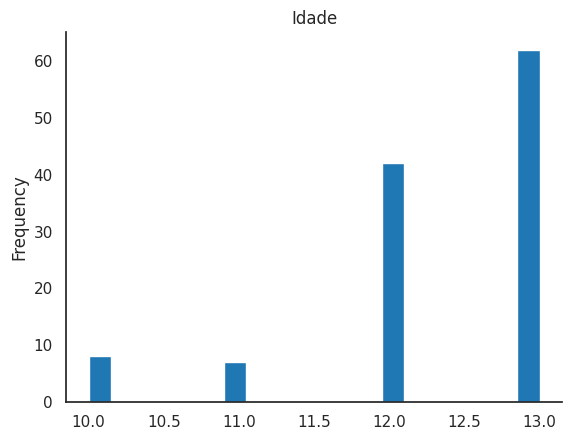

In [ ]:
df['Idade'].plot(kind='hist', bins=20, title='Idade')
plt.gca().spines[['top', 'right',]].set_visible(False)

Como vemos, temos mais alunos de 13 e 12 anos, enquanto os de 10 e 11 anos estão com menos alunos.

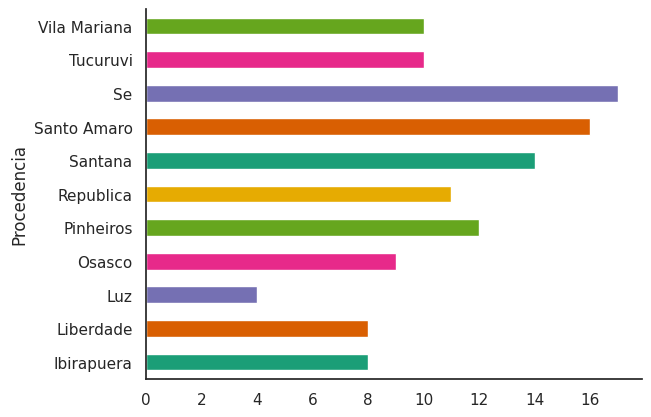

In [ ]:
df.groupby('Procedencia').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

A Procedência esta boa tambem.

# Importando as bibliotecas para o algoritmo genético:
- numpy;
- pandas;
- pygad;
- matplotlib;
- seaborn;


In [ ]:
import numpy as np
import pandas as pd
import pygad
from prettytable import PrettyTable

from itertools import repeat, chain
import random
from collections import defaultdict, Counter

#visualização dos dados:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white', palette=None)

# Preparação dos dados

In [ ]:
df = pd.read_csv('alunos.csv')

#Proporção ideal para que permita novos alunos nas salas e que não fique completamente cheia para isso
max_alunos = 25
total_alunos = df.Nome.count()
num_salas = int(np.ceil(total_alunos/max_alunos))
total_alunos_dist = int(np.ceil(total_alunos/num_salas))

#Maximo de alunos se todas as salas estiverem cheias
tam_max = int(num_salas * max_alunos)
tam_max_turmas = total_alunos_dist * num_salas

print(f'Total de alunos:  {total_alunos}')
print(f'Quantidade de salas: {num_salas}')
print(f'Quantidade de alunos por sala: {total_alunos_dist}')
print(f'Ocupação salas: {tam_max_turmas}')
print(f'Ocupação maxima total: {tam_max}')


Total de alunos:  119
Quantidade de salas: 5
Quantidade de alunos por sala: 24
Ocupação salas: 120
Ocupação maxima total: 125


# Análise para cada restrição

Agrupando a primeira letra do nome dos alunos e calculando a quantidade de alunos com essa letra por sala

In [ ]:
df_group_pletra = df.groupby('PrimeiraLetra')['PrimeiraLetra'].agg([
    ('Contagem', 'count'),
    ('MinimoSala', lambda x: np.floor(x.count()/num_salas)),
    ('MaximoSala', lambda x: np.ceil(x.count()/num_salas)),
]).reset_index()

df_group_pletra

,PrimeiraLetra,Contagem,MinimoSala,MaximoSala
0,B,8,1.0,2.0
1,C,8,1.0,2.0
2,D,2,0.0,1.0
3,E,7,1.0,2.0
4,F,10,2.0,2.0
5,G,5,1.0,1.0
6,I,7,1.0,2.0
7,J,7,1.0,2.0
8,K,5,1.0,1.0
9,L,14,2.0,3.0


Agrupando pela Procedência (a origem do aluno)

In [ ]:
df_group_proc = df.groupby('Procedencia')['Procedencia'].agg([
    ('Contagem', 'count'),
    ('MinimoSala', lambda x: np.floor(x.count()/num_salas)),
    ('MaximoSala', lambda x: np.ceil(x.count()/num_salas)),
]).reset_index()
df_group_proc

,Procedencia,Contagem,MinimoSala,MaximoSala
0,Ibirapuera,8,1.0,2.0
1,Liberdade,8,1.0,2.0
2,Luz,4,0.0,1.0
3,Osasco,9,1.0,2.0
4,Pinheiros,12,2.0,3.0
5,Republica,11,2.0,3.0
6,Santana,14,2.0,3.0
7,Santo Amaro,16,3.0,4.0
8,Se,17,3.0,4.0
9,Tucuruvi,10,2.0,2.0


Agrupamento por Sexo, visando uma distribuição equilibrada.

In [ ]:
df_group_sexo = df.groupby('Sexo')['Sexo'].agg([
    ('Contagem', 'count'),
    ('MinimoSala', lambda x: np.floor(x.count()/num_salas)),
    ('MaximoSala', lambda x: np.ceil(x.count()/num_salas)),
]).reset_index()
df_group_sexo

,Sexo,Contagem,MinimoSala,MaximoSala
0,F,63,12.0,13.0
1,M,56,11.0,12.0


Agrupamento por idade, visando uma melhor distribuição de cada idade.

In [ ]:
df_group_idade = df.groupby('Idade')['Idade'].agg([
    ('Contagem', 'count'),
    ('MinimoSala', lambda x: np.floor(x.count()/num_salas)),
    ('MaximoSala', lambda x: np.ceil(x.count()/num_salas)),
]).reset_index()
df_group_idade

,Idade,Contagem,MinimoSala,MaximoSala
0,10,8,1.0,2.0
1,11,7,1.0,2.0
2,12,42,8.0,9.0
3,13,62,12.0,13.0


# Verificando os mínimos e máximos de cada restrição para montar as penalidades.

Preparando os limites de diversidade que serão usados pelo algoritmo genético. Transformando os dados agrupados em dicionarios de referencia, para orientar como os alunos devem ser distribuidos por sala.

In [ ]:
group_pletra = df.groupby('PrimeiraLetra')['PrimeiraLetra'].value_counts().to_dict()
group_sexo = df.groupby('Sexo')['Sexo'].value_counts().to_dict()
group_idade = df.groupby('Idade')['Idade'].value_counts().to_dict()
group_proc = df.groupby('Procedencia')['Procedencia'].value_counts().to_dict()

group_pt_pletra = {k:[int(np.floor(v/num_salas)), int(np.ceil(v/ num_salas))] for k, v in group_pletra.items()}
group_pt_sexo = {k:[int(np.floor(v/num_salas)), int(np.ceil(v/ num_salas))] for k, v in group_sexo.items()}
group_pt_idade = {k:[int(np.floor(v/num_salas)), int(np.ceil(v/num_salas))] for k, v in group_idade.items()}
group_pt_proc = {k:[int(np.floor(v/num_salas)), int(np.ceil(v/num_salas))] for k, v in group_proc.items()}

print(f'Primeira Letra: {group_pletra}')
print(f'Sexo: {group_sexo}')
print(f'Idade: {group_idade}')
print(f'Procedência: {group_proc}')

print(group_pt_pletra)
print(group_pt_sexo)
print(group_pt_idade)
print(group_pt_proc)

Primeira Letra: {'B': 8, 'C': 8, 'D': 2, 'E': 7, 'F': 10, 'G': 5, 'I': 7, 'J': 7, 'K': 5, 'L': 14, 'M': 6, 'N': 3, 'O': 4, 'P': 10, 'Q': 4, 'R': 2, 'S': 1, 'U': 3, 'V': 3, 'W': 3, 'X': 1, 'Y': 3, 'Z': 3}
Sexo: {'F': 63, 'M': 56}
Idade: {10: 8, 11: 7, 12: 42, 13: 62}
Procedência: {'Ibirapuera': 8, 'Liberdade': 8, 'Luz': 4, 'Osasco': 9, 'Pinheiros': 12, 'Republica': 11, 'Santana': 14, 'Santo Amaro': 16, 'Se': 17, 'Tucuruvi': 10, 'Vila Mariana': 10}
{'B': [1, 2], 'C': [1, 2], 'D': [0, 1], 'E': [1, 2], 'F': [2, 2], 'G': [1, 1], 'I': [1, 2], 'J': [1, 2], 'K': [1, 1], 'L': [2, 3], 'M': [1, 2], 'N': [0, 1], 'O': [0, 1], 'P': [2, 2], 'Q': [0, 1], 'R': [0, 1], 'S': [0, 1], 'U': [0, 1], 'V': [0, 1], 'W': [0, 1], 'X': [0, 1], 'Y': [0, 1], 'Z': [0, 1]}
{'F': [12, 13], 'M': [11, 12]}
{10: [1, 2], 11: [1, 2], 12: [8, 9], 13: [12, 13]}
{'Ibirapuera': [1, 2], 'Liberdade': [1, 2], 'Luz': [0, 1], 'Osasco': [1, 2], 'Pinheiros': [2, 3], 'Republica': [2, 3], 'Santana': [2, 3], 'Santo Amaro': [3, 4], 'Se': 

# População Inicial

Preparando a lista final de alunos que será usada pelo algoritmo genético para criar as salas.

In [ ]:
alunos_tuples = list(df.itertuples(index=False,name='Aluno'))

#Para representar as cadeiras vazias, utilizaremos o None
list_completa_alunos = list(chain(
    alunos_tuples,
    repeat(None, tam_max_turmas - len(alunos_tuples))
))

Criando a população inicial para o algoritmo genético, gerando os primeiros candidatos para a solução.

In [ ]:
pessoa1 = list(range(0, tam_max_turmas))
pessoa2 = list(range(0, tam_max_turmas))
pessoa3 = list(range(0, tam_max_turmas))
pessoa4 = list(range(0, tam_max_turmas))
random.shuffle(pessoa1)
random.shuffle(pessoa2)
random.shuffle(pessoa3)
random.shuffle(pessoa4)

print(pessoa1)
print(pessoa2)
print(pessoa3)
print(pessoa4)

initial_population = [pessoa1, pessoa2, pessoa3, pessoa4]

[59, 26, 43, 20, 113, 10, 5, 22, 84, 17, 39, 15, 53, 110, 93, 11, 81, 19, 74, 95, 23, 96, 56, 42, 14, 0, 25, 109, 8, 4, 88, 31, 91, 46, 111, 9, 40, 115, 1, 52, 73, 27, 108, 67, 38, 82, 98, 21, 116, 65, 83, 70, 106, 28, 62, 34, 2, 29, 16, 99, 85, 41, 77, 13, 105, 48, 87, 35, 79, 63, 12, 78, 54, 32, 58, 71, 37, 7, 97, 44, 33, 103, 50, 55, 92, 68, 75, 64, 45, 112, 57, 60, 119, 89, 117, 102, 80, 72, 104, 47, 69, 6, 49, 24, 3, 61, 36, 94, 107, 100, 101, 51, 30, 90, 86, 114, 76, 18, 66, 118]
[22, 19, 2, 55, 82, 107, 89, 46, 28, 23, 51, 111, 85, 15, 114, 77, 56, 4, 1, 61, 96, 0, 17, 44, 69, 99, 95, 73, 59, 14, 91, 76, 100, 94, 6, 92, 118, 37, 49, 27, 7, 105, 38, 87, 110, 104, 62, 60, 10, 41, 42, 25, 84, 66, 53, 39, 116, 98, 5, 71, 40, 102, 72, 78, 48, 119, 34, 50, 74, 101, 79, 21, 36, 106, 70, 45, 93, 63, 112, 54, 68, 11, 29, 109, 115, 52, 13, 97, 75, 16, 8, 90, 86, 3, 18, 30, 88, 9, 31, 33, 67, 64, 12, 58, 26, 81, 117, 83, 43, 103, 65, 20, 80, 24, 57, 47, 113, 32, 108, 35]
[110, 17, 70, 77, 

Criando as funções para calcular a penalidade e para obter o aluno

In [ ]:
# Calculamos uma penalidade com base na comparação nos valores da turma com os limites de piso e teto definidos em geral.
def calcula_penalidade(turma, geral):
    penalidade = 0
    for k, v in turma.items():
        piso = geral[k][0]
        teto = geral[k][1]
        if v < piso:
            penalidade += (piso - v)
        elif v > teto:
            penalidade += (v - teto)
    return penalidade

def eh_aluno(lista_completa_alunos, index):
    return not lista_completa_alunos[index] is None;

def obtenha_alunos(lista_completa_alunos, turma):
    return [lista_completa_alunos[i] for i in turma if not lista_completa_alunos[i] is None]

Função de avaliação (fitness) do algoritmo genético.
Verificando cada solução, respeitando os limites de diversidade definidos.

In [ ]:
def calcula_penalidades(alunos_turma, sexo_pt, pl_pt, procedencia_pt, idade_pt):
    qtd_sexo = Counter(aluno.Sexo for aluno in alunos_turma)
    qtd_letras = Counter(aluno.PrimeiraLetra for aluno in alunos_turma)
    qtd_procedencia = Counter(aluno.Procedencia for aluno in alunos_turma)
    qtd_idade = Counter(aluno.Idade for aluno in alunos_turma)
    return [calcula_penalidade(qtd_sexo, sexo_pt), calcula_penalidade(qtd_letras, pl_pt), calcula_penalidade(qtd_procedencia, procedencia_pt), calcula_penalidade(qtd_idade, idade_pt)]

# Avaliando se uma turma está balanceada e retorna penalidades para cada uma das categorias
def fitness_func(ga_instance, solution, solution_idx):
    turmas_solution = np.reshape(solution, (num_salas, total_alunos_dist))
    penalidades_total = 0
    for turma in turmas_solution:
        alunos_turma = obtenha_alunos(list_completa_alunos, turma)
        penalidades = np.sum(calcula_penalidades(alunos_turma, group_pt_sexo, group_pt_pletra, group_pt_proc, group_pt_idade))
        penalidades_total += penalidades
    return 1000 - penalidades_total

# Avalia a qualidade da solução. Quanto menor a penalidade retornada melhor é a solução

Configuração dos parâmetros do algoritmo genético, controlando como as soluções evoluem ao longo das gerações.

In [ ]:
#Numero de gerações que o algoritmo irá executar
num_generations = 150000

#Numero de pais selecionados para cada geração
num_parents_mating = 2

#Numero de pessoas por população
sol_per_pop = 10

#Parametros de genes por individuo
num_genes = tam_max_turmas
init_range_low = 0
init_range_high = tam_max_turmas
gene_space = [i for i in range(0, tam_max_turmas)]

#Tipo de seleção dos pais
parent_selection_type = 'rank'
keep_parents = 2

#Tipo de cruzamento
crossover_type = 'two_points'

#Parametro de mutação
mutation_type = "swap"
mutation_percent_genes = 10


Executa o algoritmo genético e exibe a evolução de qualidade das soluções ao longo das gerações.

/usr/local/lib/python3.11/dist-packages/pygad/visualize/plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


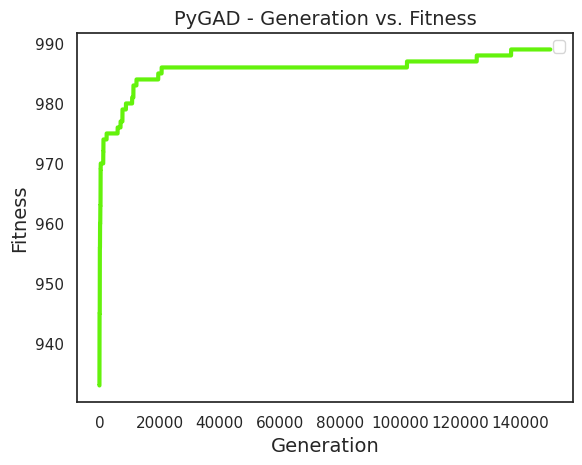

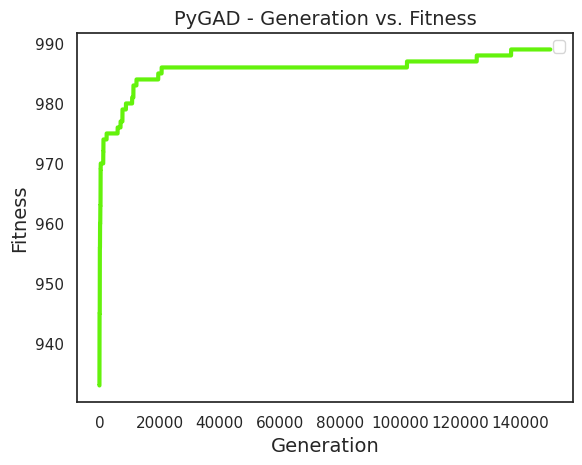

In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       initial_population=initial_population,
                       gene_space=gene_space,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       allow_duplicate_genes=False,
                       gene_type=int)

ga_instance.run()

ga_instance.plot_fitness()

Otimo! quanto mais proximo de 1000 melhor, nesse caso foi 990, ou seja, tivemos apenas 10 de penalidade.

Generation vs. Fitness

Curva crescente: Mostrando a melhora do algoritmo.

Plateus: trechos onde o algoritmo parou de melhorar por algumas gerações, bastante comum até encontrar uma nova combinação favorável.

A evolução mostra que foi necessario um grande numero de gerações (cerca de 150 mil) para atingir o melhor resultado.

Pega a melhor solução encontrada pelo algortmo genético e converte em uma estrutura representando as salas.

In [ ]:
pessoa = ga_instance.best_solution()[0]
salas = np.reshape(pessoa, newshape=(num_salas, total_alunos_dist))

Coleta estatísticas por sala com base na distribuição de alunos, após a otmização com algoritmo genético.

In [ ]:
lst_letras = []
lst_sexo = []
lst_proc = []
lst_idade = []

indice_sala = 1
for sala in salas:
  alunos_sala = obtenha_alunos(list_completa_alunos, sala)
  qtd_letras = Counter([aluno.PrimeiraLetra for aluno in alunos_sala])
  qtd_sexo = Counter([aluno.Sexo for aluno in alunos_sala])
  qtd_proc = Counter([aluno.Procedencia for aluno in alunos_sala])
  qtd_idade = Counter([aluno.Idade for aluno in alunos_sala])
  for k in qtd_sexo:
    lst_sexo.append({'Sala': indice_sala, 'Sexo': k, 'Quantidade': qtd_sexo[k]})
  for k in qtd_letras:
    lst_letras.append({'Sala': indice_sala, 'Letra': k, 'Quantidade': qtd_letras[k]})
  for k in qtd_idade:
    lst_idade.append({'Sala': indice_sala, 'Idade': k, 'Quantidade': qtd_idade[k]})
  for k in qtd_proc:
    lst_proc.append({'Sala': indice_sala, 'Procedencia': k, 'Quantidade': qtd_proc[k]})

  indice_sala += 1

# Grafico de barras agrupadas por sala e sexo.(matplotlib e seaborn)

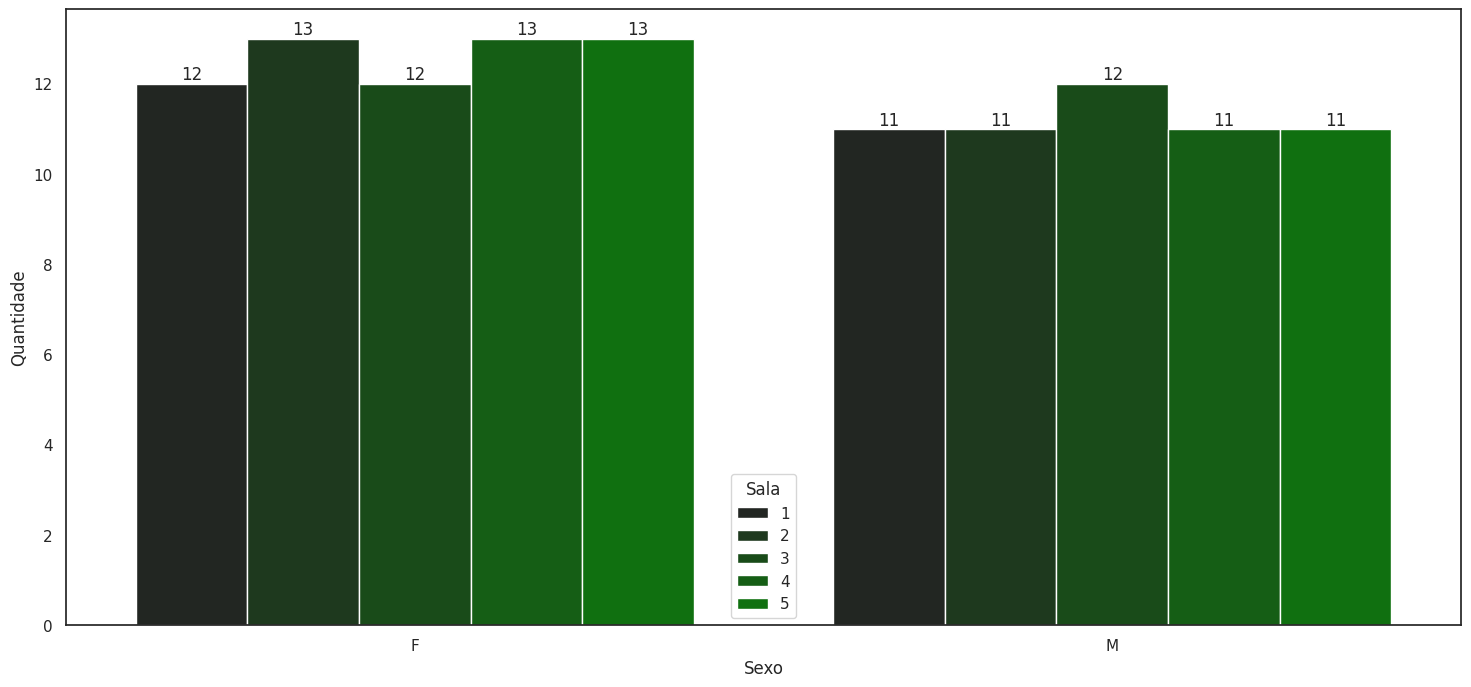

In [ ]:
plt.figure(figsize=(18, 8))
df_sexo = pd.DataFrame(data=lst_sexo)
ax = sns.barplot(x = 'Sexo', y = 'Quantidade', hue = 'Sala', data = df_sexo, palette='dark:green')
for container in ax.containers:
  ax.bar_label(container)

As sala possuem de 12 a 13 meninas e de 11 a 12 meninos.
A distribuição foi equilibrada entre as salas, dando a entender que o algortmo genético buscou essa homogeneidade.

# Grafico de barras mostrando a distribuição dos alunos pela primeira letra do nome, segmentada por sala.

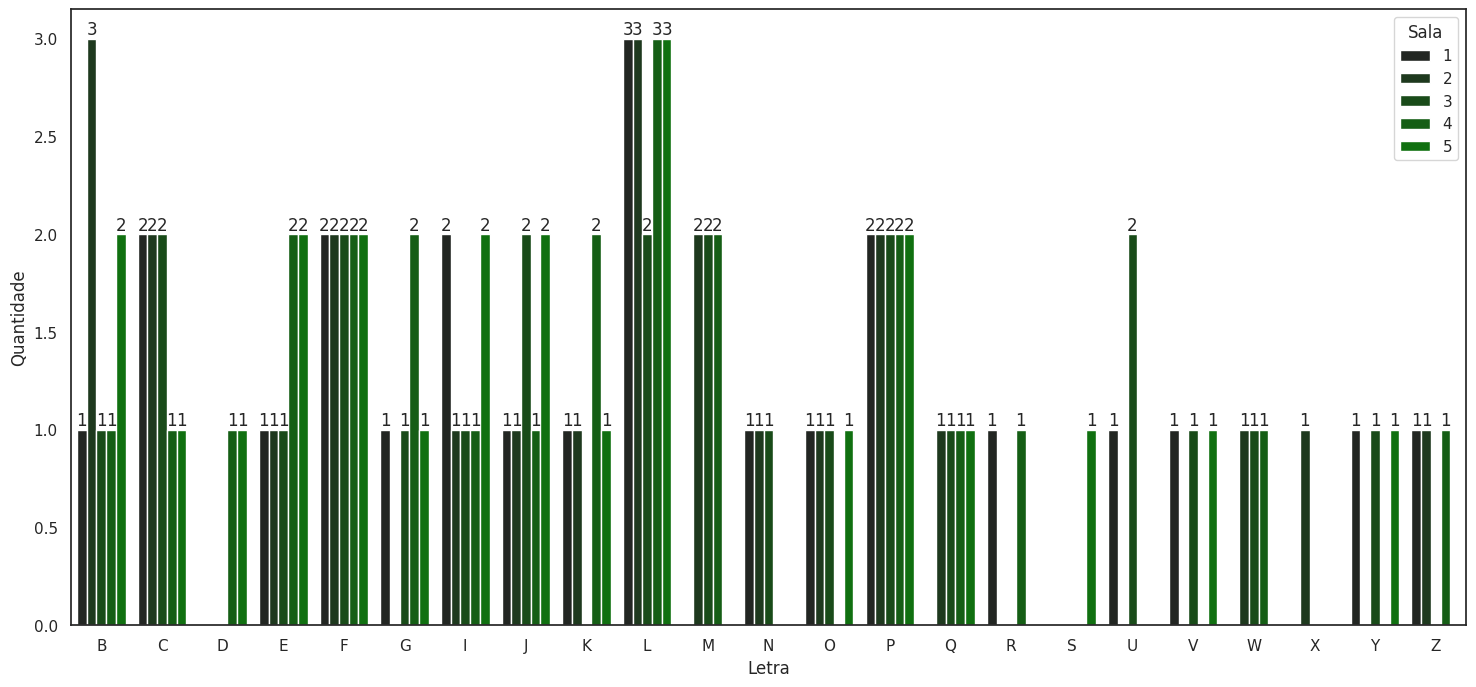

In [ ]:
plt.figure(figsize=(18, 8))
df_letras = pd.DataFrame(data=lst_letras)
df_letras.sort_values(by=['Letra'], inplace=True)
ax = sns.barplot(x = 'Letra', y = 'Quantidade', hue = 'Sala', data = df_letras, palette='dark:green')
for container in ax.containers:
  ax.bar_label(container)

As salas estão bem balanceadas em relação as iniciais dos nomes.

Ex.: a Letra "L" tem 3 alunos nas salas 1, 2, 4 e 5, e 2 alunos na sala 3. Mostrando uma distribuição homogênea.

Apenas um caso de concentração em um sala, a Letra "B", onde 3 alunos ficaram na sala 2, enquando as salas 1, 3 e 4 ficaram com 1 aluno.

# Gráfico que representa a distribuição da idade dos alunos por sala.

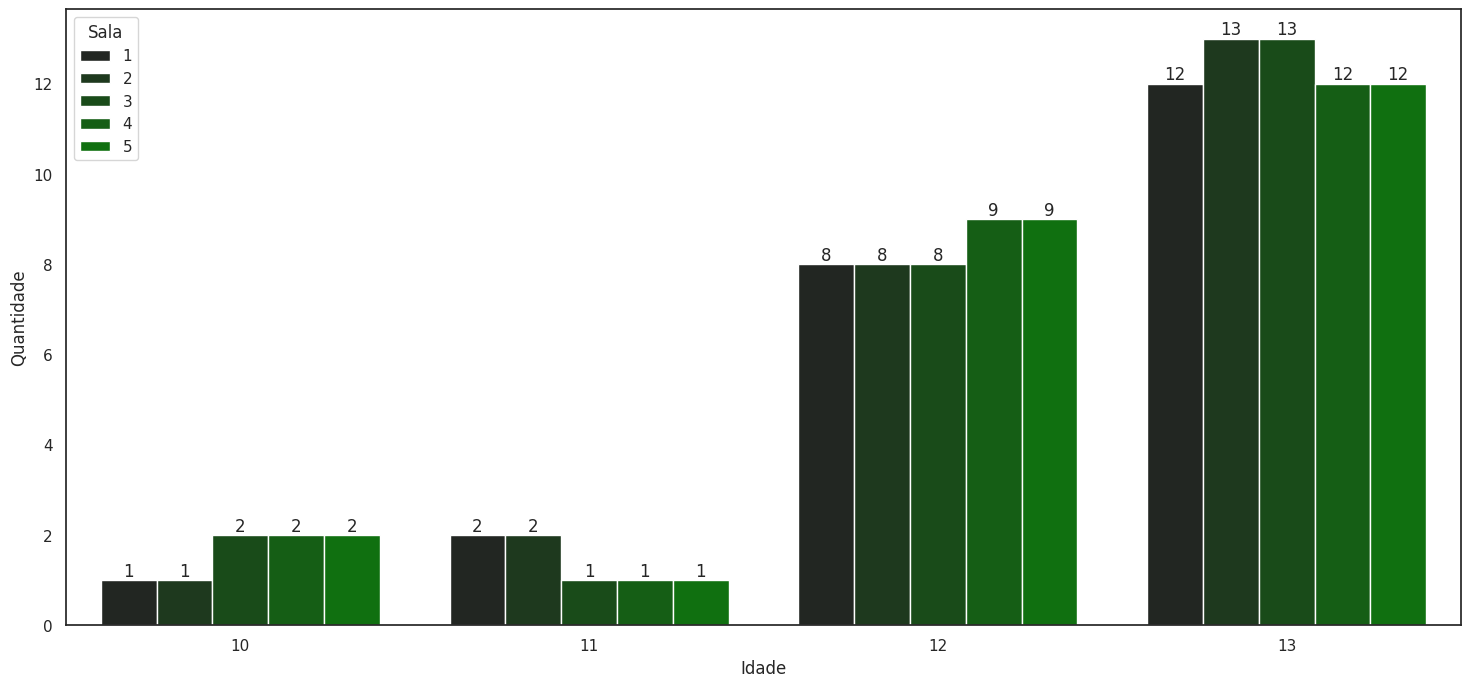

In [ ]:
plt.figure(figsize=(18, 8))
df_idade = pd.DataFrame(data=lst_idade)
df_idade.sort_values(by=['Idade'], inplace=True)
ax = sns.barplot(x = 'Idade', y = 'Quantidade', hue = 'Sala', data = df_idade, palette='dark:green')
for container in ax.containers:
  ax.bar_label(container)

Idade 13: É a mais frequente, tendo 12-13 alunos por sala, mostrando um otimo equilibrio e que boa parte dos alunos tem essa idade.

Idade 12: Otimo equilibrio tambem, tendo de 8-9 alunos por sala.

Idade 10-11: Otimo equilibrio tambem, mostrando que em todas as sala, terá pelo menos 1 aluno com essas idades.

# Grafico de barras agrupadas mostrando a quantidade de alunos por Procedência em cada sala.

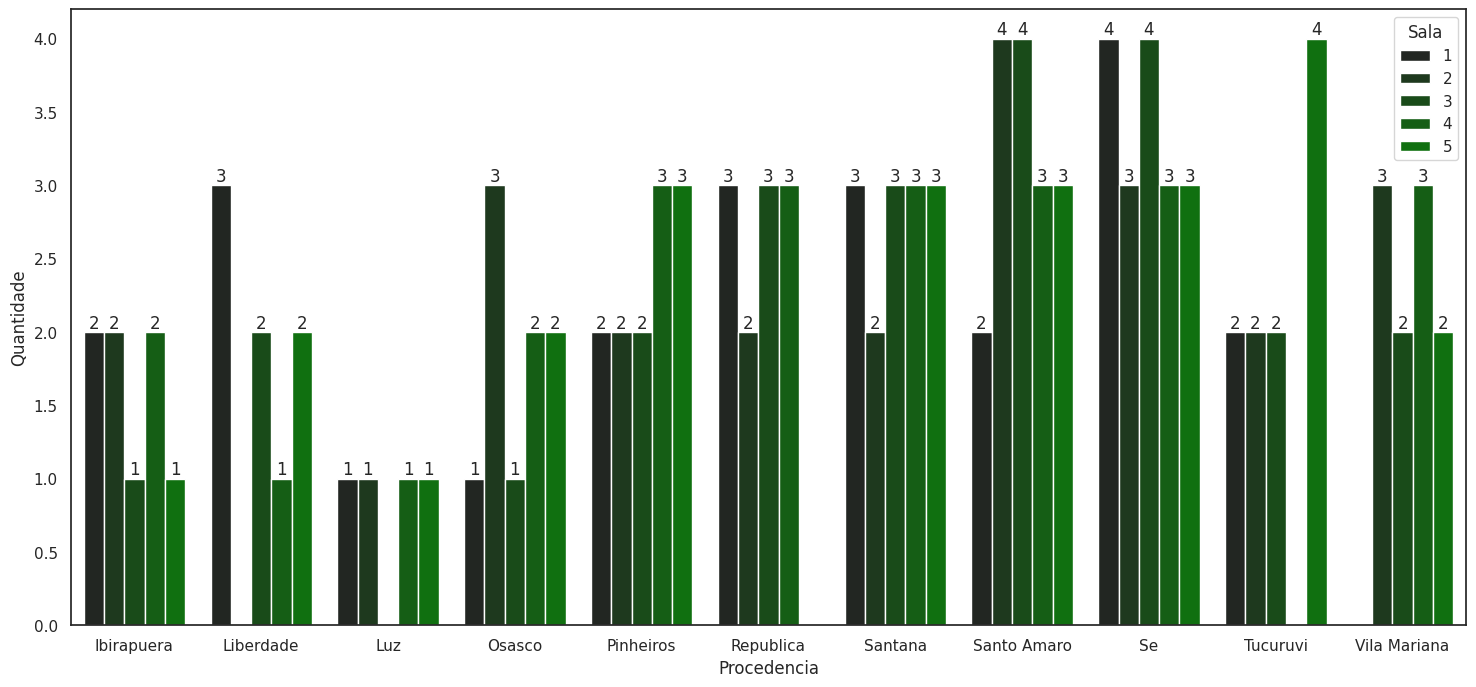

In [ ]:
plt.figure(figsize=(18, 8))
df_proc = pd.DataFrame(data=lst_proc)
df_proc.sort_values(by=['Procedencia'], inplace=True)
ax = sns.barplot(x = 'Procedencia', y = 'Quantidade', hue = 'Sala', data = df_proc, palette='dark:green')
for container in ax.containers:
  ax.bar_label(container)

Bem distribuida, "Santo Amaro" e "Se" com mais alunos e "Luz" com poucos alunos.
Diversidade de procedências foi muito bem distribuida entre as salas, um dos objetivos do algoritmo genetico.

# Conclusão do Projeto

O projeto mostra que os algoritmos geneticos podem sim resolver problemas humanos, garantindo igualdade e economizando tempo.

A mesma tecnica usada nesse projeto pode ser usada em outros problemas semelhantes, como montar grupos em eventos, contruir equipes em empresas ou ate mesmo montar grupos em faculdades ou escolas automaticamente.